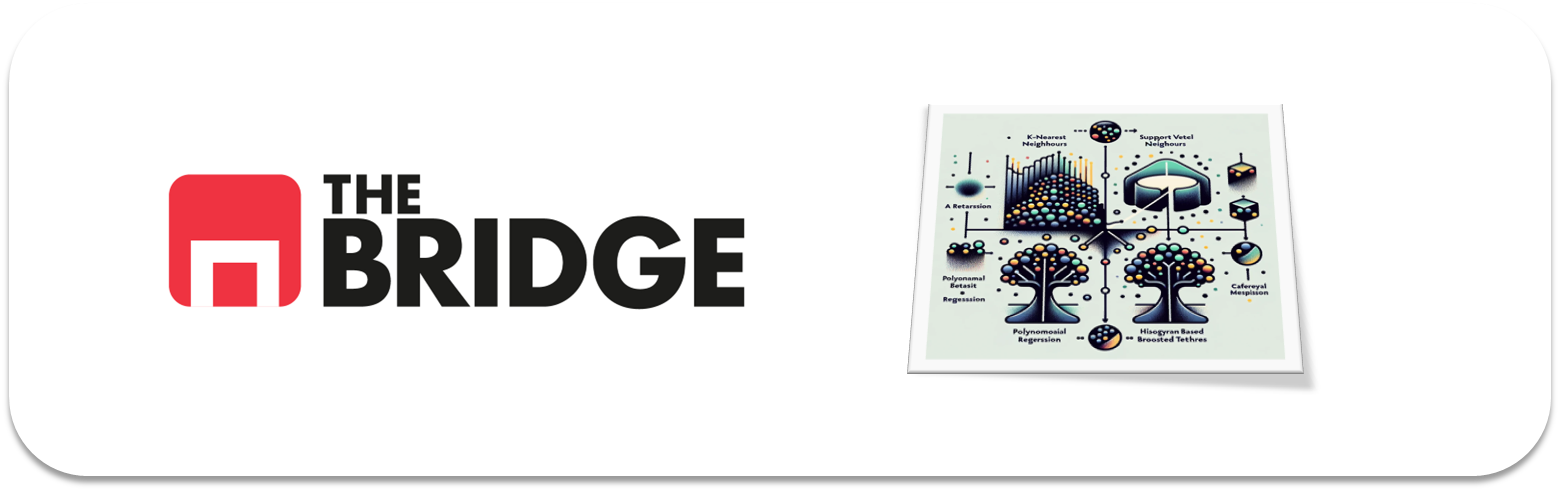

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as booty
import tlbx

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv('./data/wines_dataset.csv', sep='|')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
target1 = 'quality'
target2 = 'alcohol'

In [5]:
df[target1].value_counts(True)

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

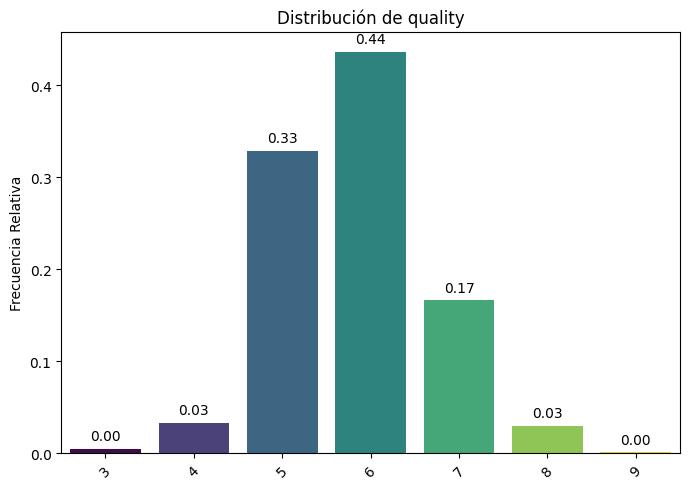

In [6]:
booty.pinta_distribucion_categoricas(df, [target1], mostrar_valores=True, relativa=True)

- Very unbalanced classes
    - will need to play with balancing techers
    - or possibly group into fewer classes

In [7]:
df['good'] = df[target1].apply(lambda x: 1 if x > 6 else 0)

In [8]:
target3 = 'good'

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

---
---
### 1. Split
---

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target1])

---
---
### 2. MiniEDA I
---

#### target1

In [10]:
train_set[target1].value_counts()

6    2269
5    1710
7     863
4     173
8     154
3      24
9       4
Name: quality, dtype: int64

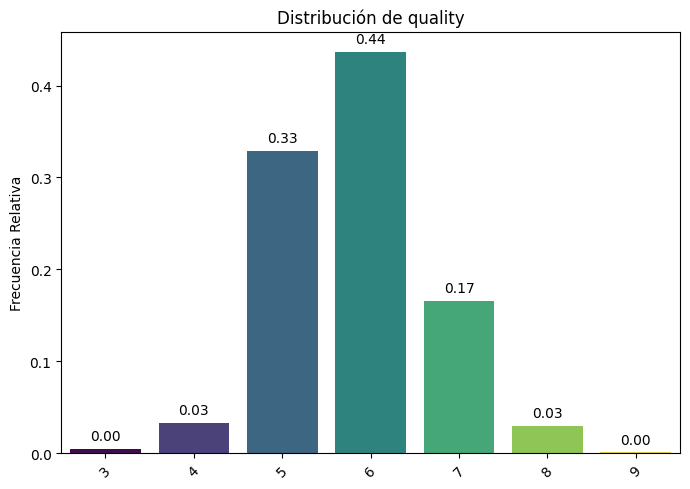

In [11]:
booty.pinta_distribucion_categoricas(train_set, [target1], mostrar_valores=True, relativa=True)

---
#### target3

In [12]:
train_set[target3].value_counts(True)

0    0.803541
1    0.196459
Name: good, dtype: float64

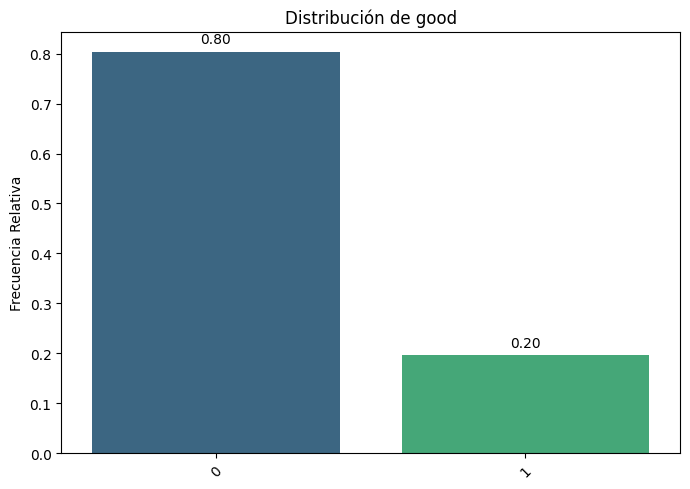

In [13]:
booty.pinta_distribucion_categoricas(train_set, [target3], mostrar_valores=True, relativa=True)

- Still very unbalanced if target feature `quality` is split into good and not good
- Wines are generally rated as 'good' if they score above 7

---
---
### 3. MiniEDA II
---

In [14]:
num_features = [col for col in train_set.columns if col != target1 and col !=target2 and col != target3 and col != 'class']

In [15]:
len(num_features)

10

---
#### target1: 'quality'

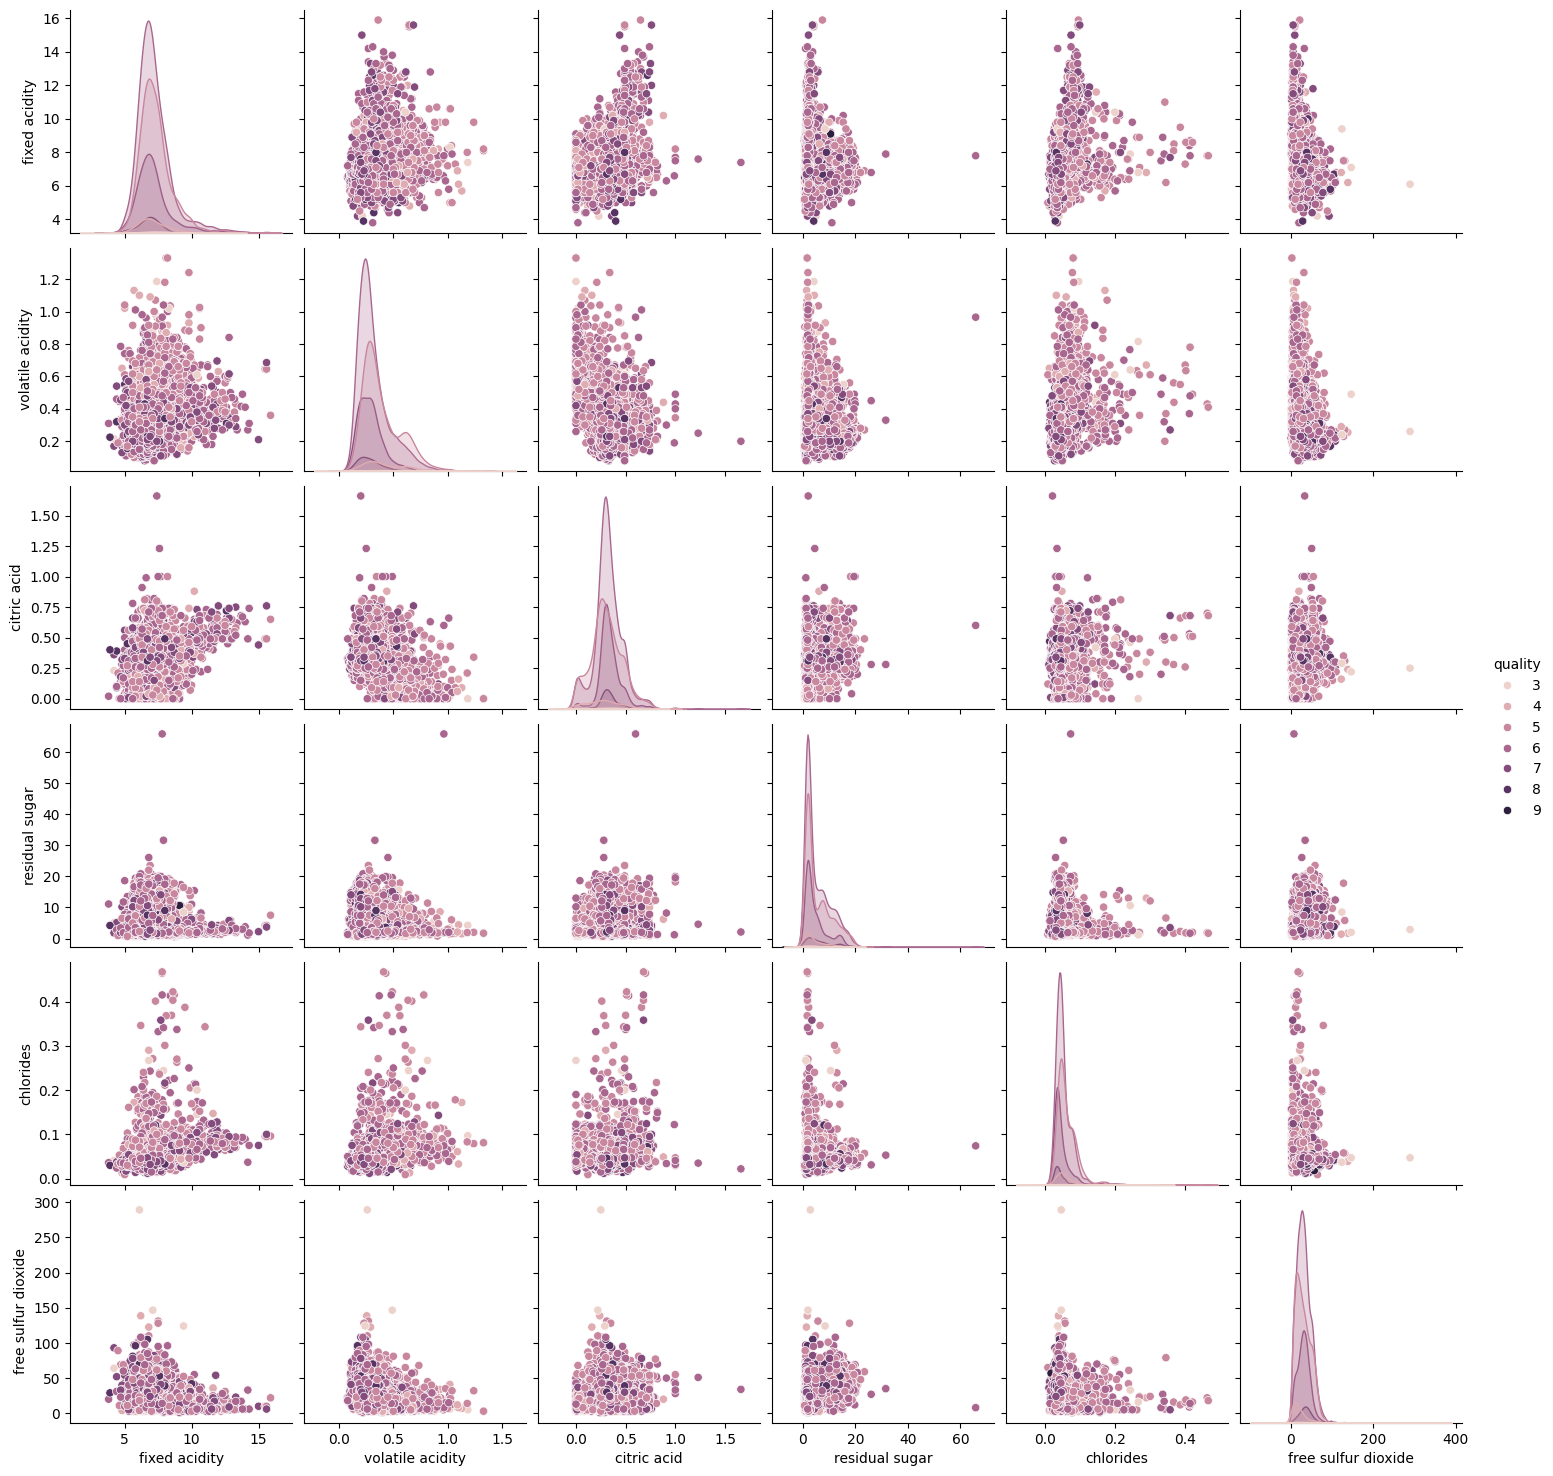

In [16]:
sns.pairplot(train_set[num_features[0:6] + [target1]], hue=target1)

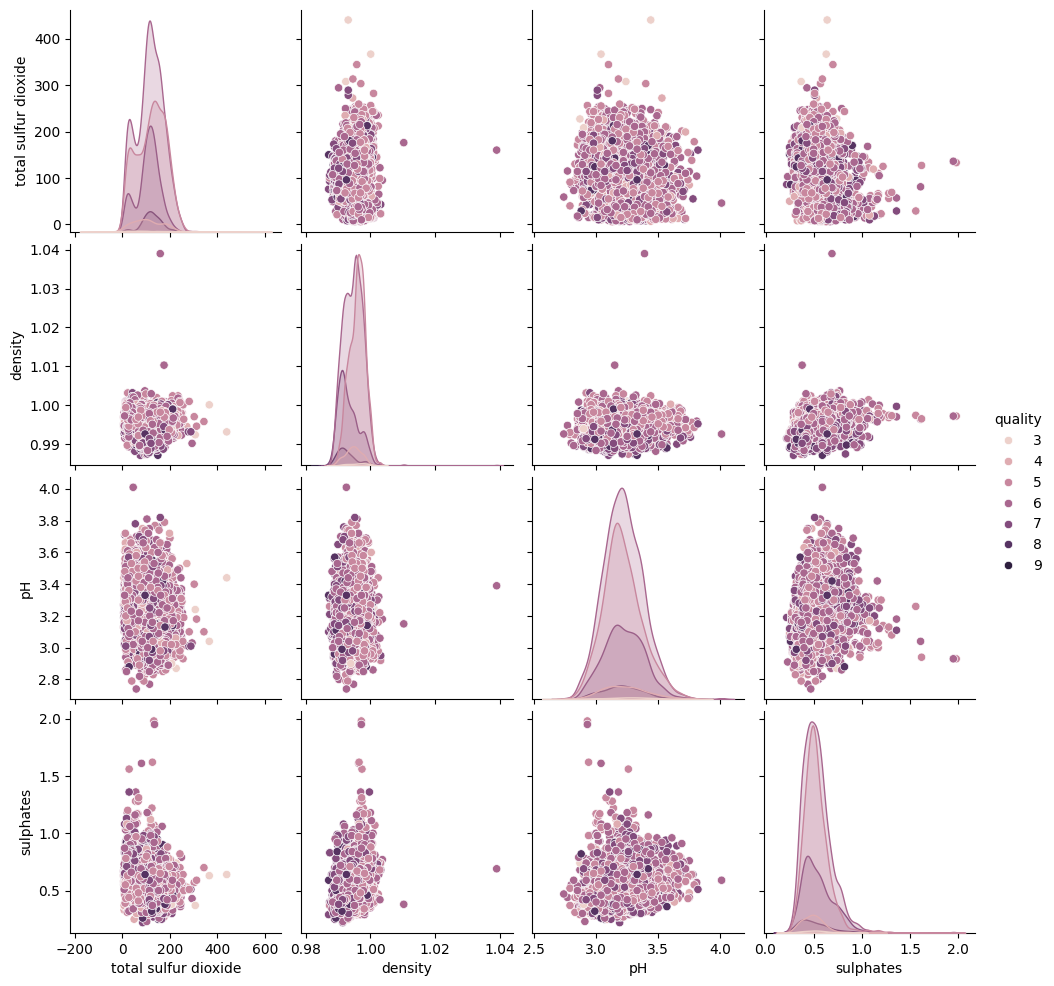

In [17]:
sns.pairplot(train_set[num_features[6:12] + [target1]], hue=target1)

---
#### target3: 'good'

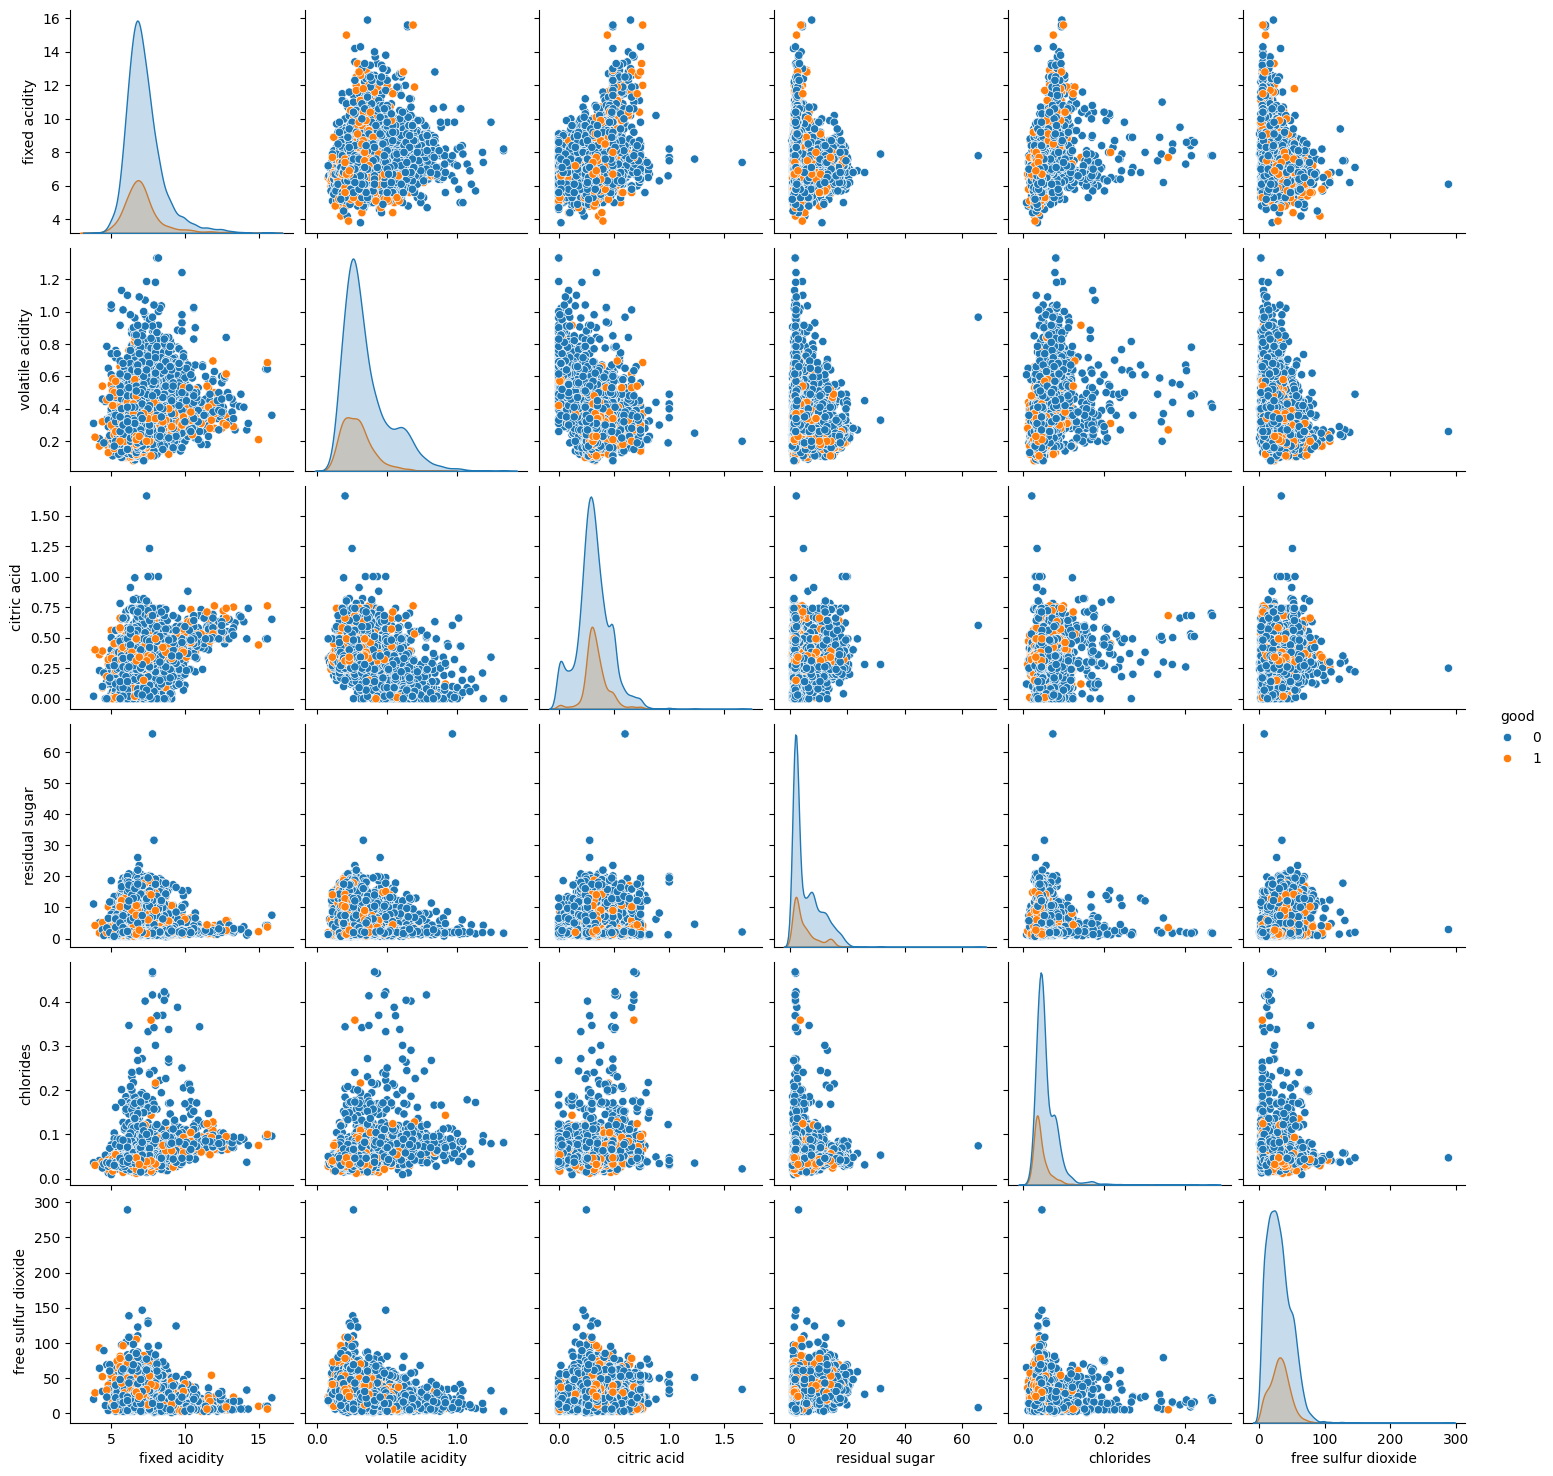

In [18]:
sns.pairplot(train_set[num_features[0:6] + [target3]], hue=target3)

- little colinearity
- nothing jumping out as an especially useful feature
- middle 4 in this set showing some peaking over slightly differing distributions
interesting = ['volatile acidity','citric acid','residual sugar','chlorides']

In [19]:
interesting = ['volatile acidity','citric acid','residual sugar','chlorides']

---

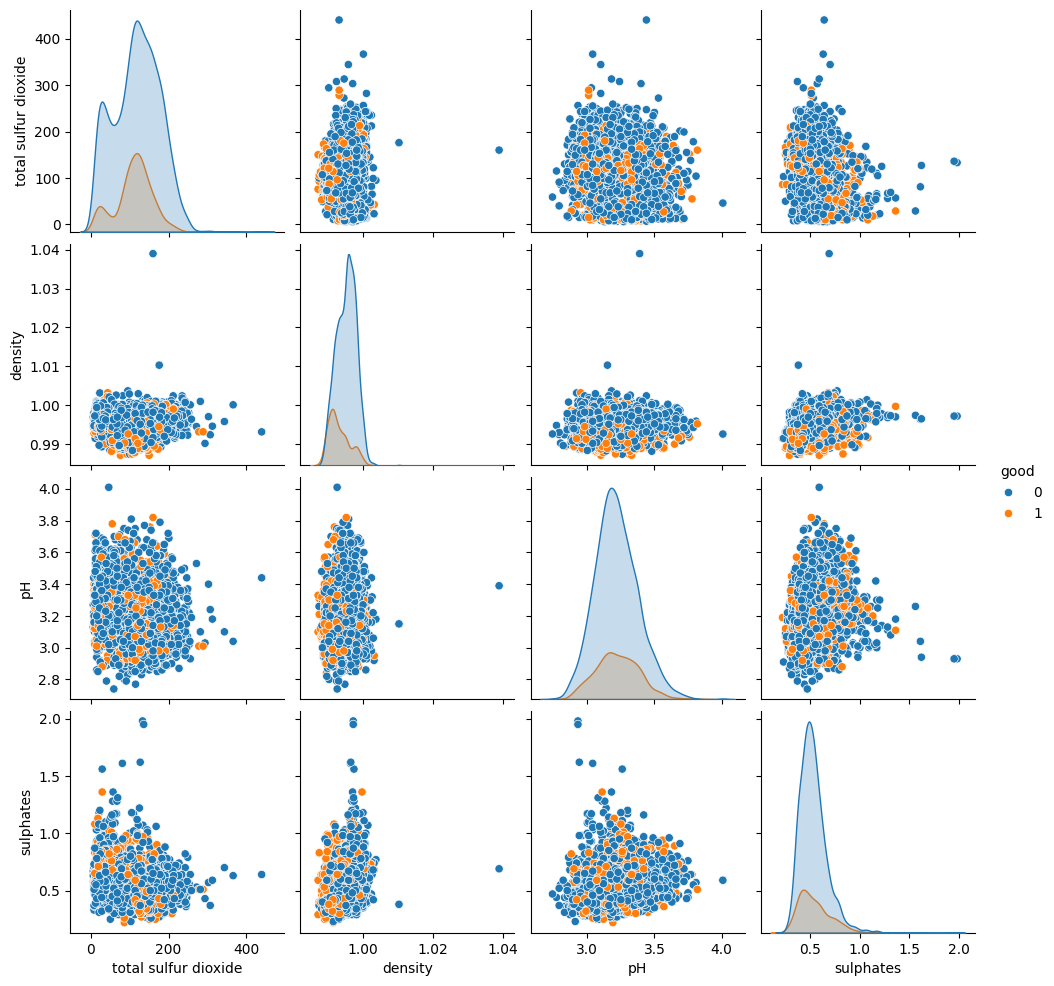

In [20]:
sns.pairplot(train_set[num_features[6:12] + [target3]], hue=target3)

- same as first set of features really
- density and alcohol could be of some interest due to differences in peak distributions. Could be more pronounced if classes were more balanced

In [21]:
interesting.append('density')
interesting.append('alcohol')

---

In [22]:
corr = train_set.corr(numeric_only=True)

In [23]:
corr[interesting].loc[interesting]

,volatile acidity,citric acid,residual sugar,chlorides,density,alcohol
volatile acidity,1.000000,-0.377897,-0.193212,0.391150,0.275577,-0.043211
citric acid,-0.377897,1.000000,0.143789,0.021045,0.095604,-0.004981
residual sugar,-0.193212,0.143789,1.000000,-0.136138,0.553606,-0.361373
chlorides,0.391150,0.021045,-0.136138,1.000000,0.369459,-0.260342
density,0.275577,0.095604,0.553606,0.369459,1.000000,-0.683073
alcohol,-0.043211,-0.004981,-0.361373,-0.260342,-0.683073,1.000000


- no particularly high correlation so not too worried about any colinearity issues for regression based models

In [24]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,0.220817,0.323177,-0.117708,0.307635,-0.281124,-0.334945,0.454615,-0.246149,0.304609,-0.085195,-0.061450,-0.041630
volatile acidity,0.220817,1.000000,-0.377897,-0.193212,0.391150,-0.354051,-0.413969,0.275577,0.265065,0.219272,-0.043211,-0.266623,-0.160887
citric acid,0.323177,-0.377897,1.000000,0.143789,0.021045,0.132164,0.192876,0.095604,-0.326042,0.049744,-0.004981,0.095983,0.061858
residual sugar,-0.117708,-0.193212,0.143789,1.000000,-0.136138,0.399389,0.496381,0.553606,-0.272849,-0.196298,-0.361373,-0.029531,-0.058505
chlorides,0.307635,0.391150,0.021045,-0.136138,1.000000,-0.214054,-0.292987,0.369459,0.063257,0.380276,-0.260342,-0.202787,-0.165609
free sulfur dioxide,-0.281124,-0.354051,0.132164,0.399389,-0.214054,1.000000,0.720809,0.020070,-0.151025,-0.189710,-0.175778,0.062885,0.024207
total sulfur dioxide,-0.334945,-0.413969,0.192876,0.496381,-0.292987,0.720809,1.000000,0.029992,-0.239315,-0.282021,-0.265385,-0.041013,-0.047793
density,0.454615,0.275577,0.095604,0.553606,0.369459,0.020070,0.029992,1.000000,0.011794,0.256004,-0.683073,-0.295533,-0.271541
pH,-0.246149,0.265065,-0.326042,-0.272849,0.063257,-0.151025,-0.239315,0.011794,1.000000,0.195741,0.113848,0.005395,0.014007
sulphates,0.304609,0.219272,0.049744,-0.196298,0.380276,-0.189710,-0.282021,0.256004,0.195741,1.000000,-0.005453,0.033801,0.025485


- possibly need to choose between total and free sulfur dioxide as reasonably high correlation (0.72)
- probably go with total sulfur dioxide in an 'all feature' set
---

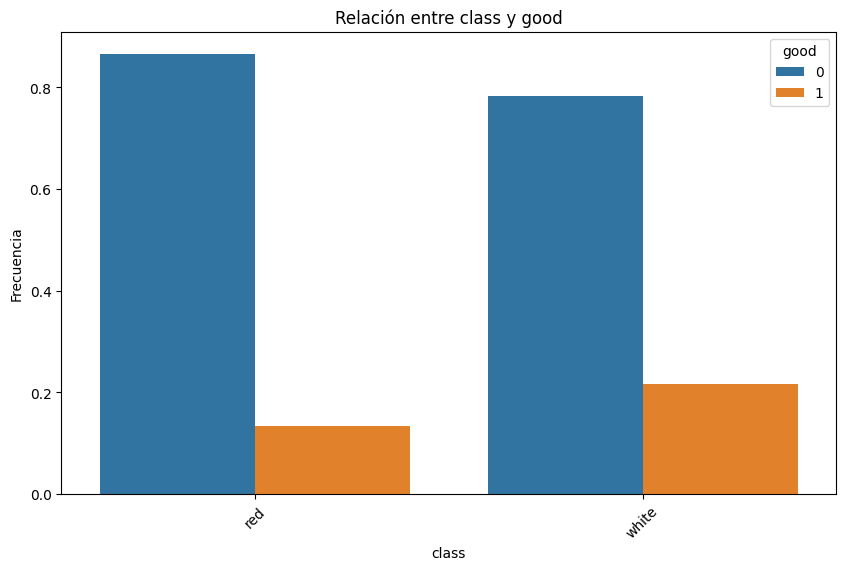

In [25]:
booty.plot_categorical_relationship_fin(train_set, 'class', target3, relative_freq=True)

- red/white class doesnt seem to have much impact on `good` rating
    - include in all but not for interesting

---

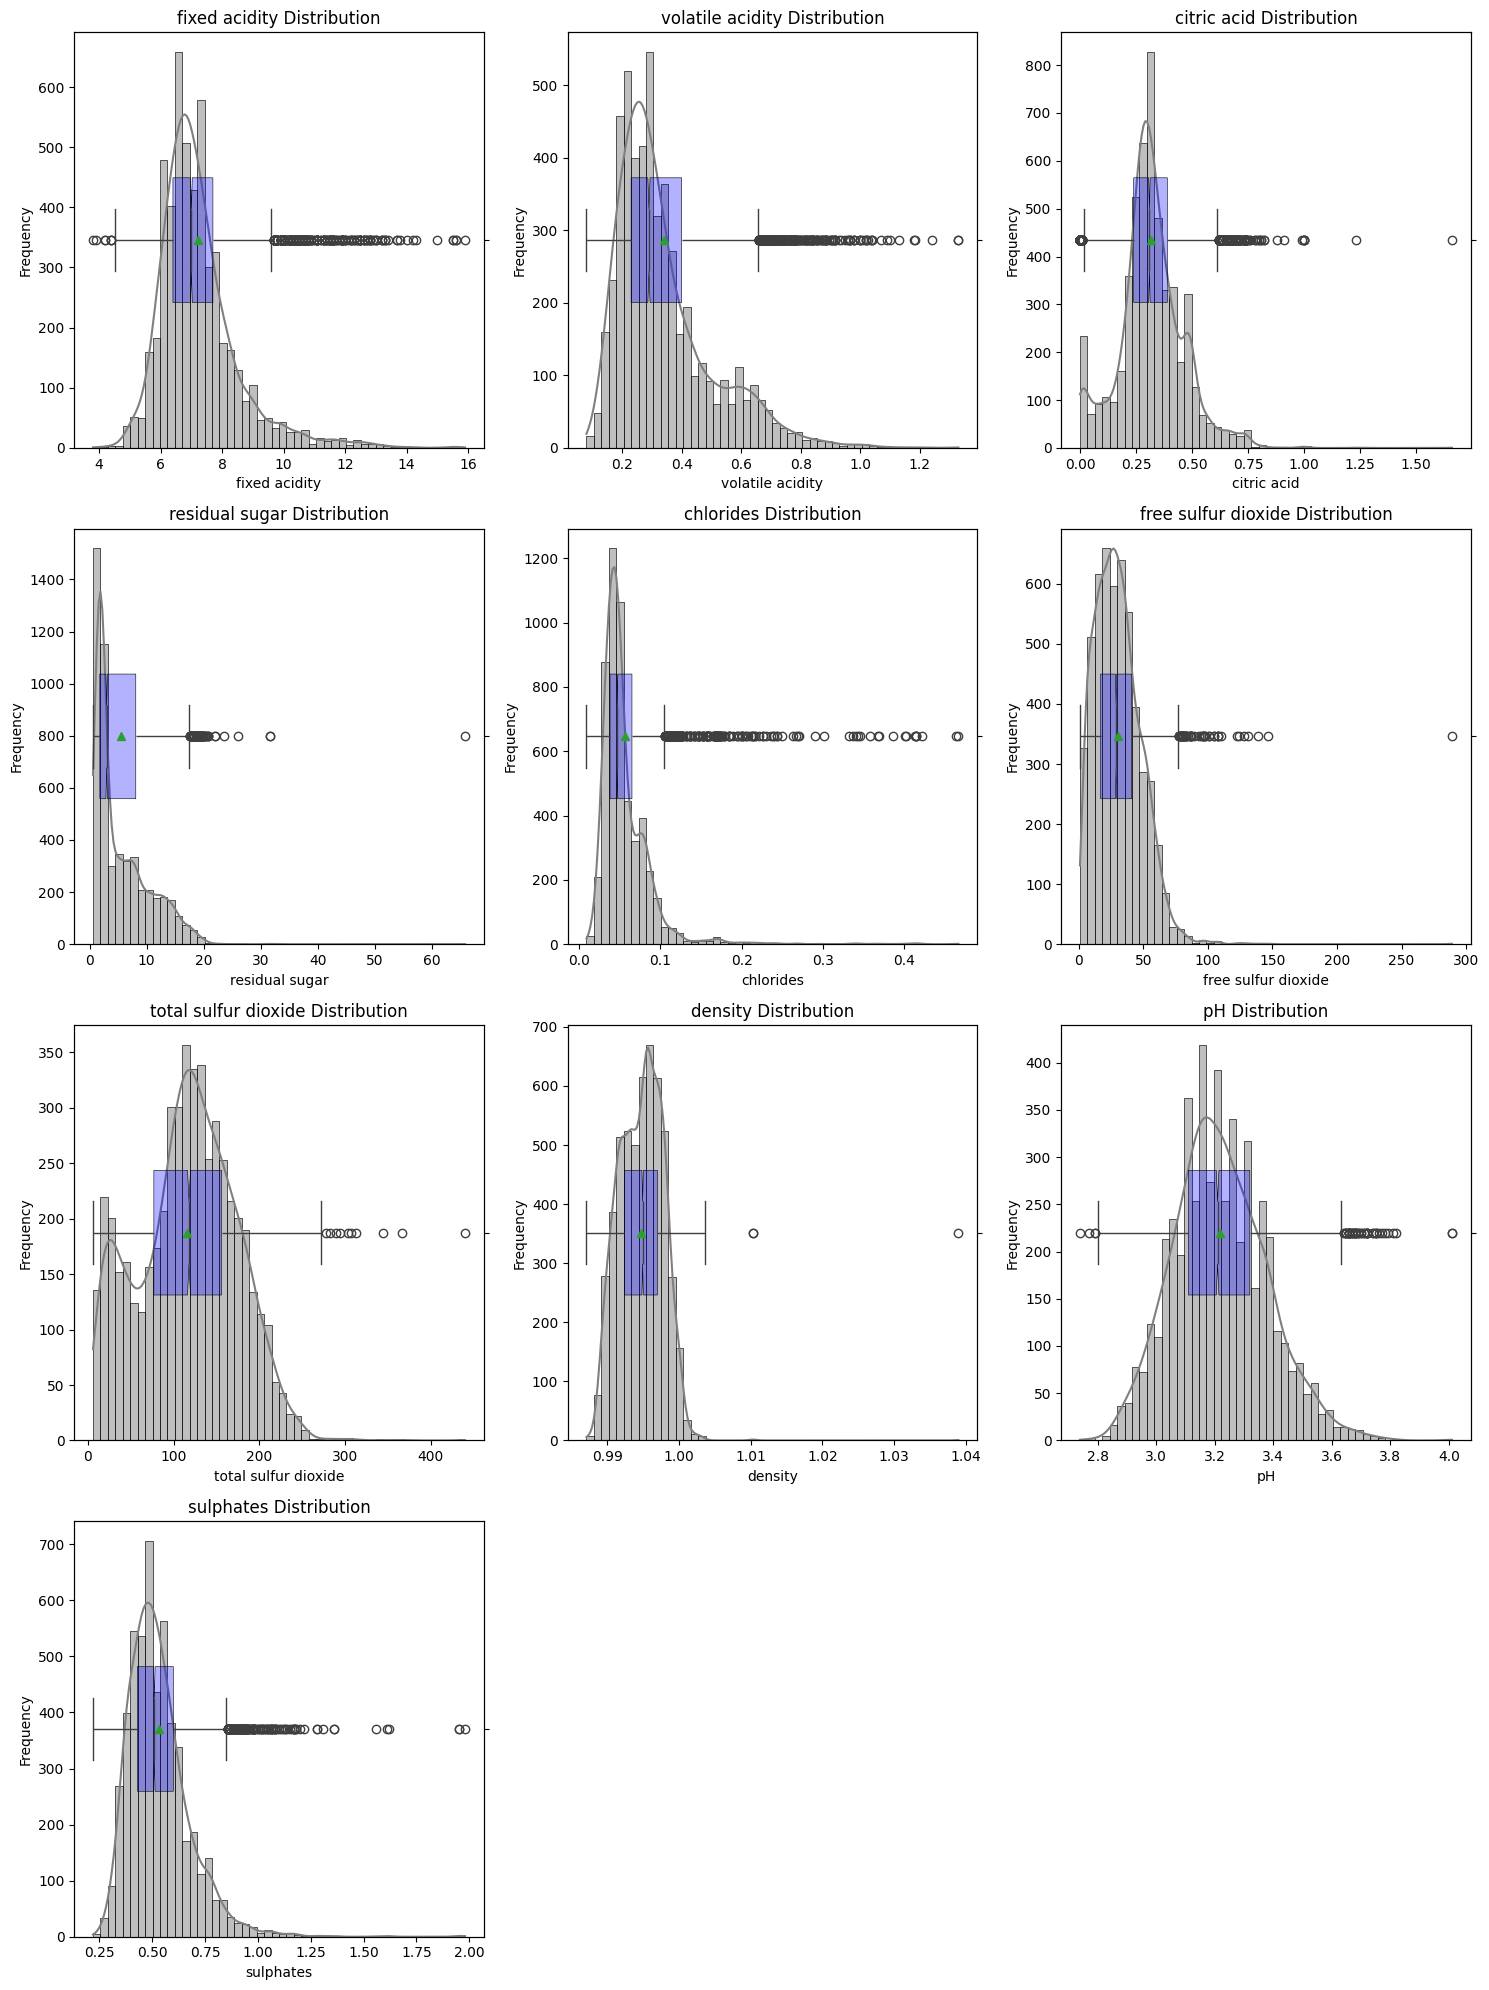

In [26]:
tlbx.histo_with_box(train_set, num_features, bins=50, kde=True, box_mean=True, boxprops=tlbx.boxprops)

In [27]:
features_log = ['fixed acidity','volatile acidity','citric acid',
                'residual sugar','chlorides','free sulfur dioxide',
                'total sulfur dioxide','density','sulphates']

- quite a lot of outliers in most features
    - especially, `chlorides`, `volatile acdity` and `fixed acidity`
- will try to get more normal distributions through log and standardscaler

---
---
### Features
---

- going to have two feature sets:
    - num_features:
    - interesting:

- going to create a scaled train/test set for use with regression models
- I will try out 4 models

In [28]:
models = ['LogisticRegression','RandomForestClassifier','XGBoostClassifier','LightGBMClassifier']

---
#### Feature treatment

In [29]:
train_set['class'] = (train_set['class'] == 'white').astype(int)
test_set['class'] = (test_set['class'] == 'white').astype(int)

In [30]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [31]:
for col in features_log:
    add = 0
    if train_set_scaled[col].min() <= 0:
        add = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + add)
    test_set_scaled[col] = np.log(test_set_scaled[col] + add)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled[num_features] = scaler.fit_transform(train_set_scaled[num_features])
test_set_scaled[num_features] = scaler.transform(test_set_scaled[num_features])

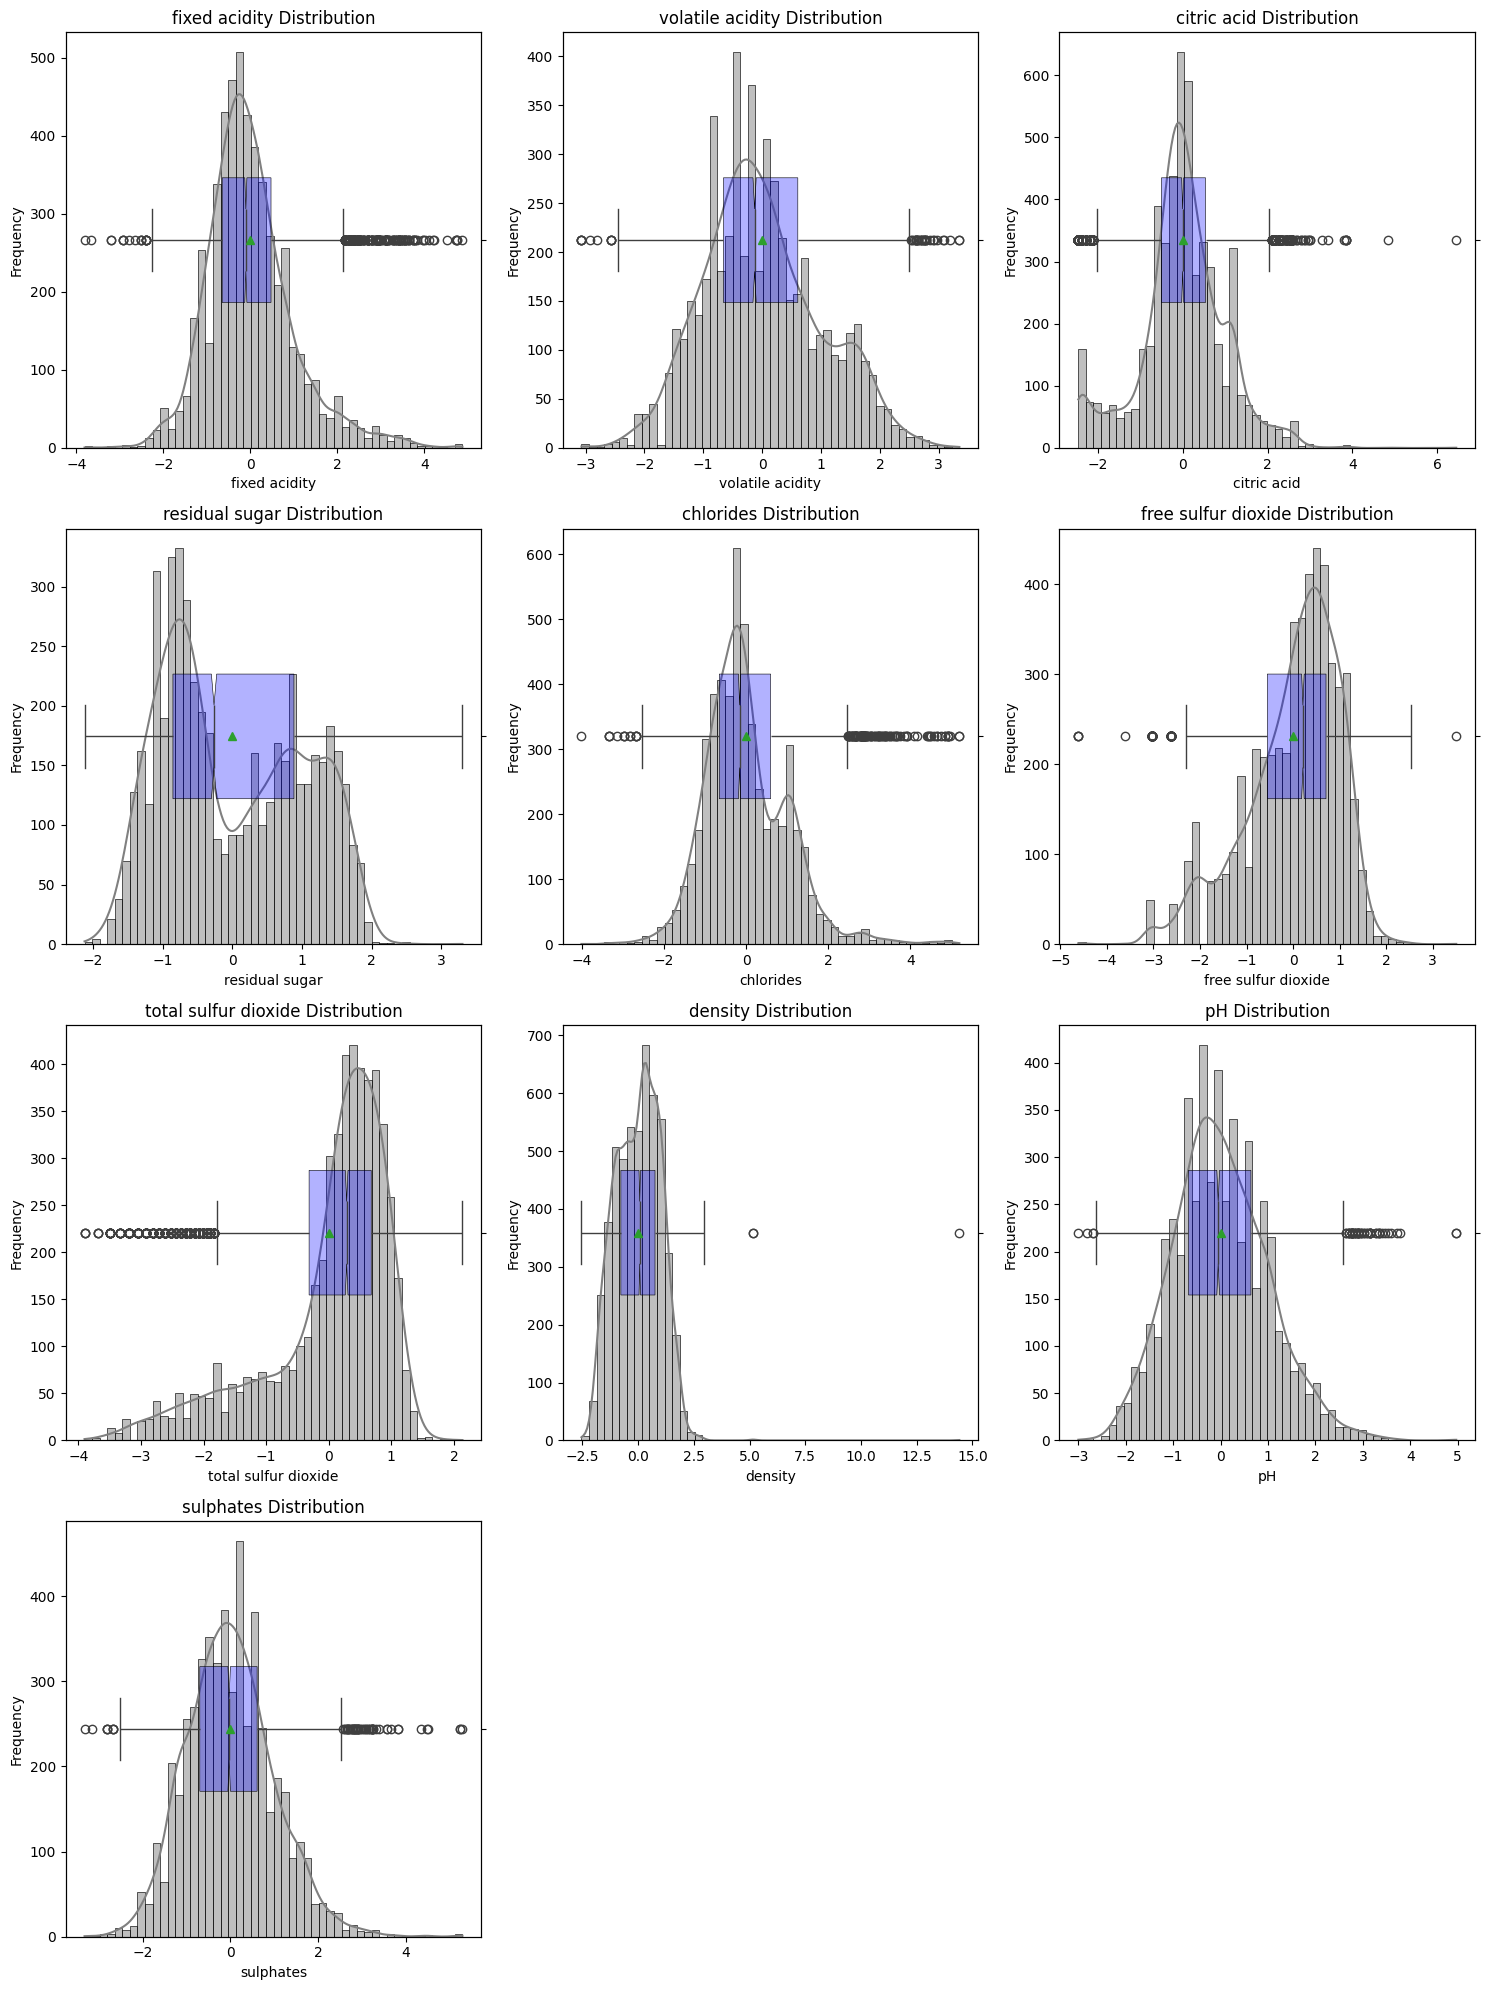

In [33]:
tlbx.histo_with_box(train_set_scaled, num_features, bins=50, kde=True, box_mean=True, boxprops=tlbx.boxprops)

- made quite a strange change to `total sulfur dioxide`
- 3 features sets:
    - all features
    - all features - total sulfur dioxide
    - only interesting features

In [34]:
all_features = num_features + ['class']

In [35]:
all_features 

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'class']

In [36]:
all_reduced = [col for col in all_features if col != 'total sulfur dioxide']

In [37]:
interesting

['volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'density',
 'alcohol']

---
---
#### Train and Test
---

In [38]:
y_train = train_set[target3]
y_test = test_set[target3]

X_train_dict = {}
X_test_dict = {}

feature_set_names = ['all', 'all_reduced', 'interesting']
feature_sets = [all_features, all_reduced, interesting]

for name, set in zip(feature_set_names, feature_sets):
    X_train_dict[name] = train_set[set]
    X_test_dict[name] = test_set[set]

X_train_scaled_dict = {}
X_test_scaled_dict = {}

for name, set in zip(feature_set_names, feature_sets):
    X_train_scaled_dict[name] = train_set_scaled[set]
    X_test_scaled_dict[name] = test_set_scaled[set]


---
---
#### Instantiate Models
---

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

lr_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
xgb_clf = XGBClassifier(max_depth=5, random_state=42)
lgb_clf = LGBMClassifier(max_depth=5, random_state=42, verbose=-100)

models = {
    'Logistic Regression': lr_clf,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'LightGBM': lgb_clf
}

---
---
### Compare models
---

In [40]:
from sklearn.model_selection import cross_val_score

for set, X_train in X_train_dict.items():
    X_train_scaled = X_train_scaled_dict[set]
    print(f'For the set "{set}":')
    print('-'*30)

    for kind, model in models.items():
        print(f'{kind}: ', end=' ')
        if kind != 'Logistic Regression':
            print(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')))
        else:
            print(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy')))

    print('*'*40)
    print()

For the set "all":
------------------------------
Logistic Regression:  0.6027095337377799
Random Forest:  0.5677662328579884
XGBoost:  0.7434780107191382
LightGBM:  0.7096385590629097
****************************************

For the set "all_reduced":
------------------------------
Logistic Regression:  0.5974486635935052
Random Forest:  0.5713579164051473
XGBoost:  0.7348466654315706
LightGBM:  0.7080237973319868
****************************************

For the set "interesting":
------------------------------
Logistic Regression:  0.5894163495241502
Random Forest:  0.6045825010581695
XGBoost:  0.719736699262161
LightGBM:  0.6775392147476891
****************************************



In [41]:
"""
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees/boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage (controls model updates)
    'max_depth': [3, 5, 7, 9],  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weights needed in a leaf
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for building each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.3, 0.5],  # Minimum loss reduction required to make a split
    'reg_alpha': [0, 0.1, 1],  # L1 regularization (adds sparsity)
    'reg_lambda': [1, 1.5, 2],  # L2 regularization (prevents overfitting)
    'scale_pos_weight': [1, 3, 5]  # Balancing positive and negative classes (for imbalanced datasets)
}
"""

"\nparam_grid = {\n    'n_estimators': [100, 200, 500],  # Number of trees/boosting rounds\n    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage (controls model updates)\n    'max_depth': [3, 5, 7, 9],  # Maximum depth of trees\n    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weights needed in a leaf\n    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for building each tree\n    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree\n    'gamma': [0, 0.1, 0.3, 0.5],  # Minimum loss reduction required to make a split\n    'reg_alpha': [0, 0.1, 1],  # L1 regularization (adds sparsity)\n    'reg_lambda': [1, 1.5, 2],  # L2 regularization (prevents overfitting)\n    'scale_pos_weight': [1, 3, 5]  # Balancing positive and negative classes (for imbalanced datasets)\n}\n"

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees/boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage (controls model updates)
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weights needed in a leaf
    'subsample': [0.6, 0.8],  # Fraction of samples used for building each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
}

xgb_grid = GridSearchCV(xgb_clf,
                        param_grid=param_grid,
                        cv=5,
                        scoring='balanced_accuracy')

xgb_grid.fit(X_train_dict[feature_set_names[0]], y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8]},
             scoring='balanced_accuracy')

In [43]:
print(f'Best Params: {xgb_grid.best_params_}')
print(f'Best Score: {xgb_grid.best_score_}')

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.6}
Best Score: 0.7613332183874547


In [44]:
from sklearn.metrics import classification_report

y_pred = xgb_grid.best_estimator_.predict(X_test_dict[feature_set_names[0]])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1044
           1       0.74      0.57      0.64       256

    accuracy                           0.88      1300
   macro avg       0.82      0.76      0.78      1300
weighted avg       0.87      0.88      0.87      1300



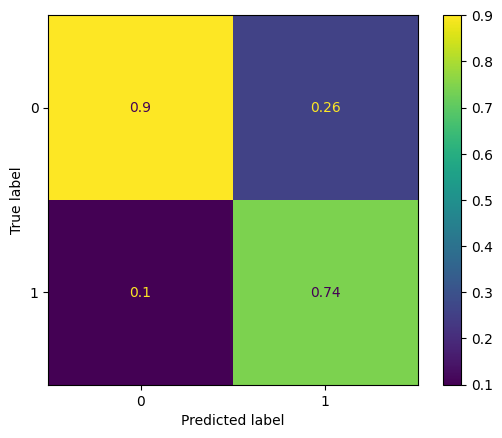

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='pred')

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.